In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 

In [3]:
# Load the data
df = pd.read_csv('student-scores.csv')
print(df.head())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [4]:
# Drop the columns that are not needed
df = pd.DataFrame(df)
obselete_columns = ['id','first_name','last_name','email','gender', 'career_aspiration']
df.drop(obselete_columns, axis=1, inplace=True)
print(df.head())

df = pd.get_dummies(df, columns=['part_time_job', 'extracurricular_activities'], prefix=['part_time_job', 'extracurricular_activities'], dtype=int, )
print(df.head())

obselete_columns = ['part_time_job_False','extracurricular_activities_False']
df.drop(obselete_columns, axis=1, inplace=True)


   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours  math_score  history_score  physics_score  \
0                       27          73             81             93   
1                       47          90             86             96   
2                       13          81             97             95   
3                        3          71             74             88   
4                       10          84             77             65   

   chemistry_score  biology_score  english_score  geography_score  
0               97             63             80               87  
1              100             90             88          

In [5]:
df = df.explode(['weekly_self_study_hours'])

# Convert the 'weekly_self_study_hours' column to integer
df['weekly_self_study_hours'] = df['weekly_self_study_hours'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x).astype(np.int64)
df['extracurricular_activities_True'] = df['extracurricular_activities_True'].astype('int64')
# Save the modified data
df.to_csv('modified_student_scores.csv', index=False)

In [6]:
#initialise the independent variables

part_time_job = df['part_time_job_True'].values
weekly_self_study_hours = df['weekly_self_study_hours'].values
missing_days = df['absence_days'].values
extracurricular_activities = df['extracurricular_activities_True'].values

In [7]:
#intialise the dependent variables
math_score = df['math_score'].values
history_score = df['history_score'].values
physics_score = df['physics_score'].values
chemistry_score = df['chemistry_score'].values
biology_score = df['biology_score'].values
english_score = df['english_score'].values
geography_score = df['geography_score'].values


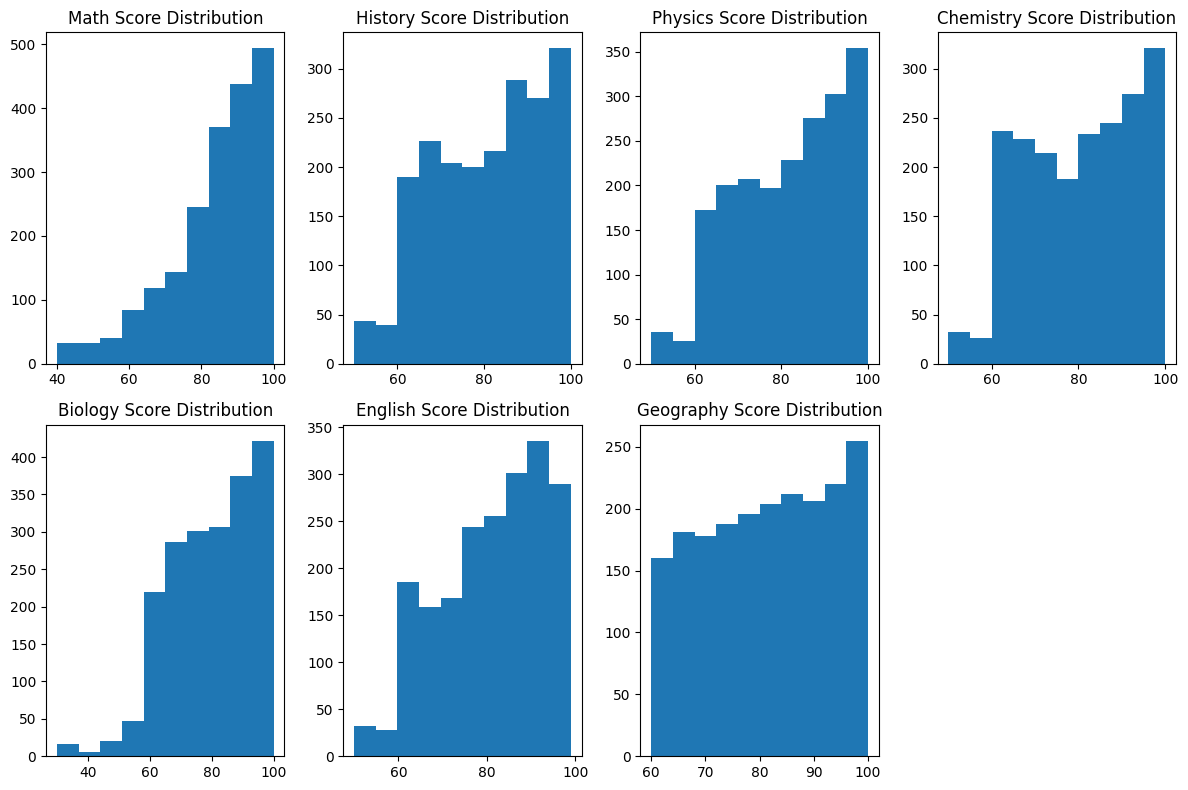

In [8]:

# Calculate the distribution of scores
math_score_dist = np.histogram(math_score, bins=10)
history_score_dist = np.histogram(history_score, bins=10)
physics_score_dist = np.histogram(physics_score, bins=10)
chemistry_score_dist = np.histogram(chemistry_score, bins=10)
biology_score_dist = np.histogram(biology_score, bins=10)
english_score_dist = np.histogram(english_score, bins=10)
geography_score_dist = np.histogram(geography_score, bins=10)

# Plot the distribution of scores
plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.hist(math_score, bins=10)
plt.title('Math Score Distribution')

plt.subplot(2, 4, 2)
plt.hist(history_score, bins=10)
plt.title('History Score Distribution')

plt.subplot(2, 4, 3)
plt.hist(physics_score, bins=10)
plt.title('Physics Score Distribution')

plt.subplot(2, 4, 4)
plt.hist(chemistry_score, bins=10)
plt.title('Chemistry Score Distribution')

plt.subplot(2, 4, 5)
plt.hist(biology_score, bins=10)
plt.title('Biology Score Distribution')

plt.subplot(2, 4, 6)
plt.hist(english_score, bins=10)
plt.title('English Score Distribution')

plt.subplot(2, 4, 7)
plt.hist(geography_score, bins=10)
plt.title('Geography Score Distribution')

plt.tight_layout()
plt.show()


Above is the distributions for the scores the students perform in each subject in the dataset. 

Here we can see that maths sand biology has the most varying in distrubutions where students peform poorly in compared to any other subject with scors of 30-40. The rest The students perform with 60+ scores which is good. 

Physics score appear to be more concentrated in the middle range, with fewer scores at the extremes. This suggests that most students achieved a moderate level of competence in physics, but there were a few who excelled and a few who struggled. Chemistry is similar to this.

Biology scores appear to be more concentrated in the lower and middle ranges, with fewer scores at the highest range. This suggests that most students found biology somewhat challenging.

 Geography is fairly uniformly distributed with most students performing well. English is similar with students ,mostly performing highly.

 from 



<h1> Normalisation </h1>

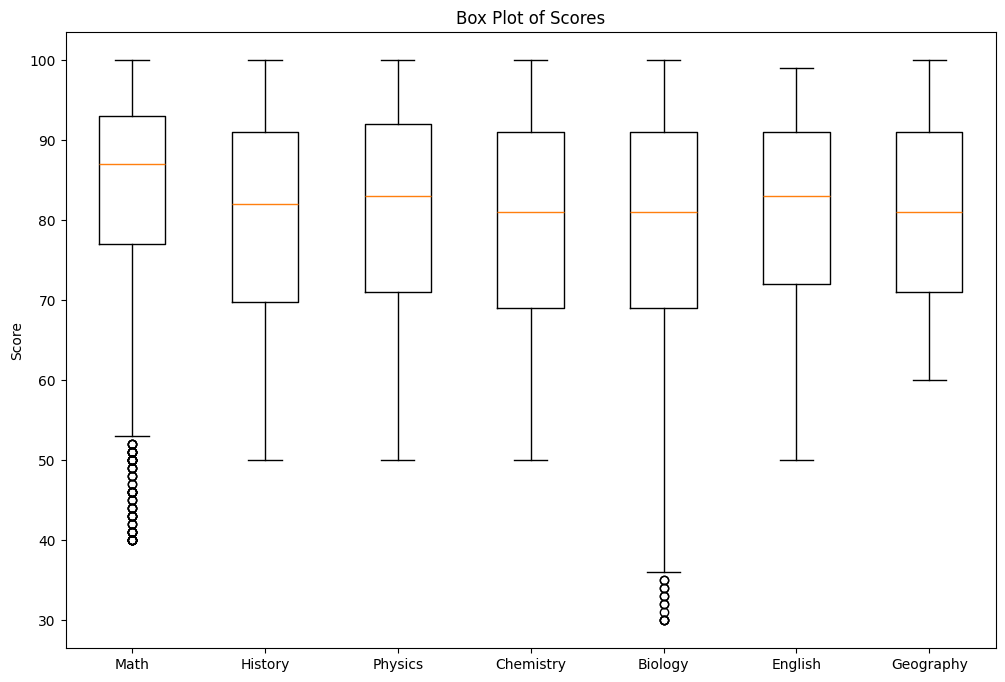

In [9]:
plt.figure(figsize=(12, 8))
plt.boxplot([math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Math', 'History', 'Physics', 'Chemistry', 'Biology', 'English', 'Geography'])
plt.ylabel('Score')
plt.title('Box Plot of Scores')

plt.show()

The boxes for math, physics, chemistry, and English have a similar spread, which suggests that the scores in these subjects are relatively evenly distributed. The boxes for history and biology appear to be wider, indicating a greater range of scores in these subjects.

The medians for math, physics, and chemistry are all higher than the medians for history, biology, and English. This suggests that students scored higher on average in math, physics, and chemistry compared to the other subjects.

There appear to be some outliers in Maths and Biology. They may indicate that there are students who performed much   lower than the majority of the class in those subjects.

In [35]:
def remove_outliers_iqr(df, column_name):
    """Removes outliers based on the interquartile range (IQR) method."""
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

# Filter outliers
df_filtered = df.copy() # Create a copy
df_filtered = remove_outliers_iqr(df_filtered, 'biology_score')
df_filtered = remove_outliers_iqr(df_filtered, 'math_score')


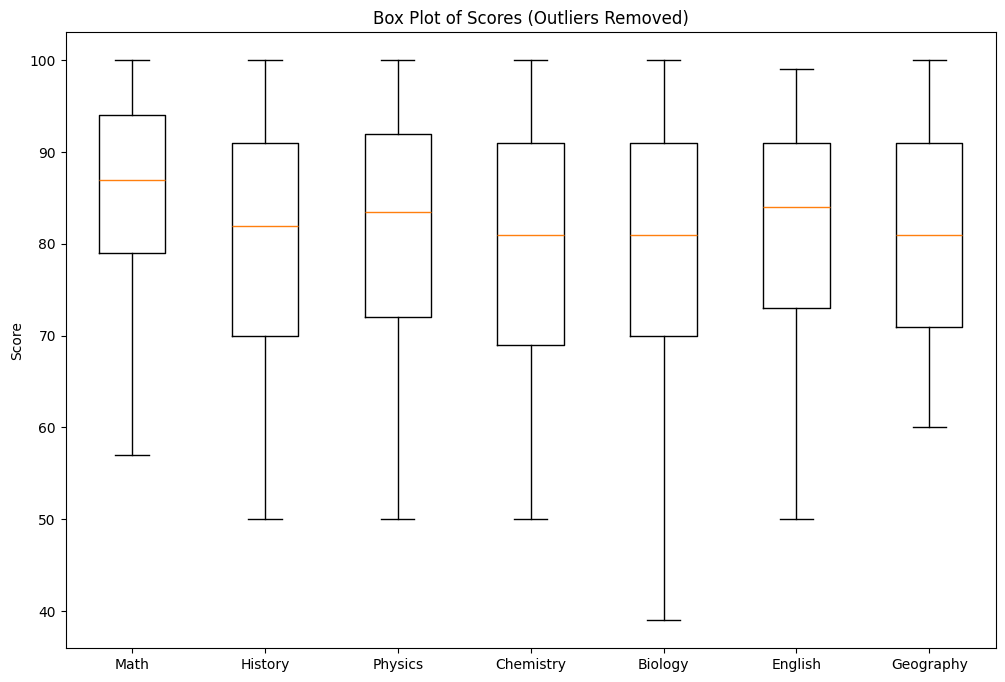

In [36]:
plt.figure(figsize=(12, 8))
plt.boxplot([df_filtered['math_score'], df_filtered['history_score'], 
             df_filtered['physics_score'], df_filtered['chemistry_score'], 
             df_filtered['biology_score'], df_filtered['english_score'], 
             df_filtered['geography_score']])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Math', 'History', 'Physics', 'Chemistry', 'Biology', 'English', 'Geography'])
plt.ylabel('Score')
plt.title('Box Plot of Scores (Outliers Removed)') 
plt.show()

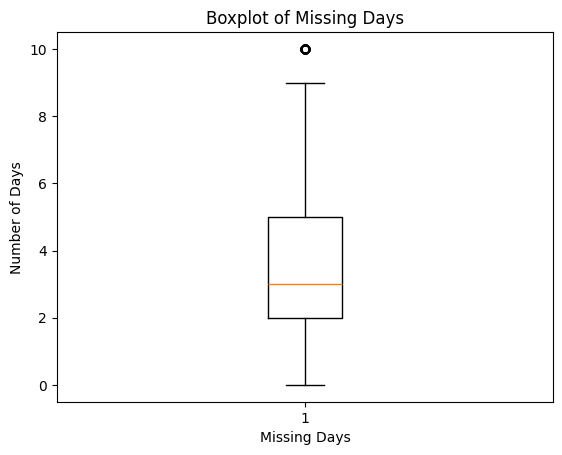

In [37]:
import matplotlib.pyplot as plt

plt.boxplot(missing_days)
plt.xlabel('Missing Days')
plt.ylabel('Number of Days')
plt.title('Boxplot of Missing Days')
plt.show()


In [39]:
df_filtered = remove_outliers_iqr(df_filtered, 'absence_days')

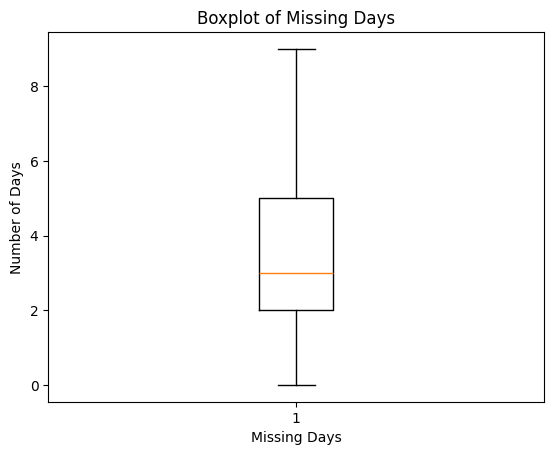

In [40]:
import matplotlib.pyplot as plt

plt.boxplot(df_filtered['absence_days'])
plt.xlabel('Missing Days')
plt.ylabel('Number of Days')
plt.title('Boxplot of Missing Days')
plt.show()


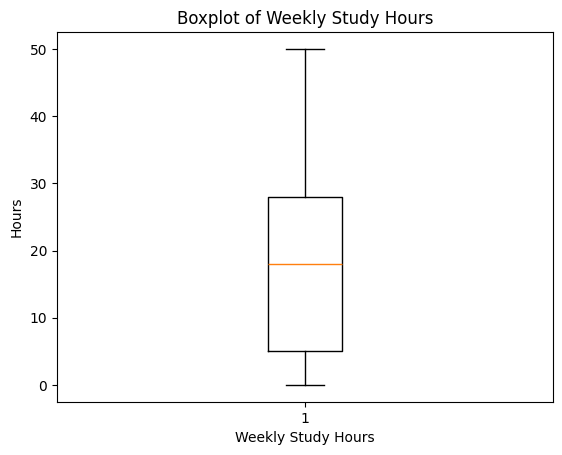

In [41]:
import matplotlib.pyplot as plt

# Assuming you have a variable called "weekly_self_study_hours" containing the data
plt.boxplot(weekly_self_study_hours)
plt.xlabel('Weekly Study Hours')
plt.ylabel('Hours')
plt.title('Boxplot of Weekly Study Hours')
plt.show()


In [42]:
df_filtered = df


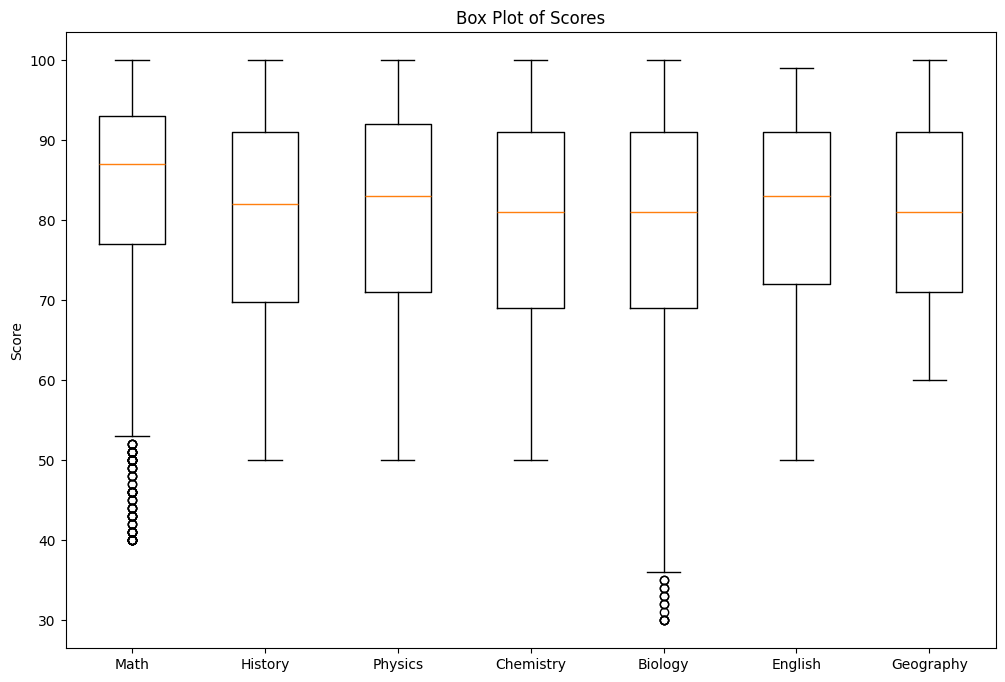

In [43]:
plt.figure(figsize=(12, 8))
plt.boxplot(df_filtered[[math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score]])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Math', 'History', 'Physics', 'Chemistry', 'Biology', 'English', 'Geography'])
plt.ylabel('Score')
plt.title('Box Plot of Scores')

plt.show()

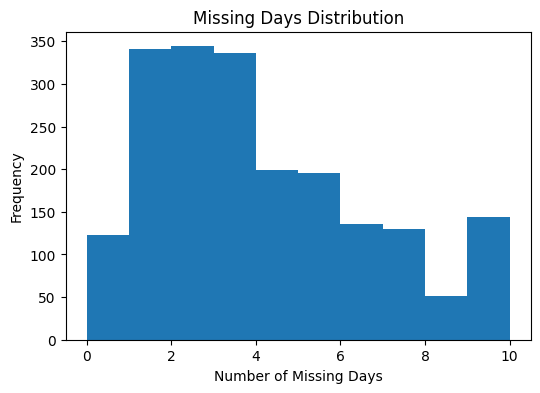

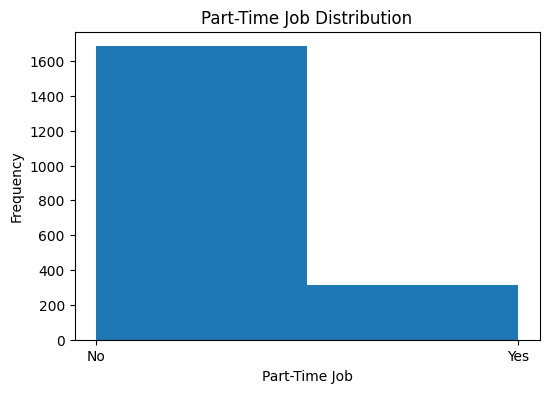

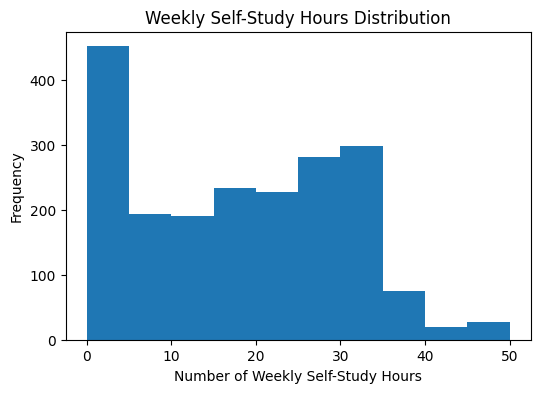

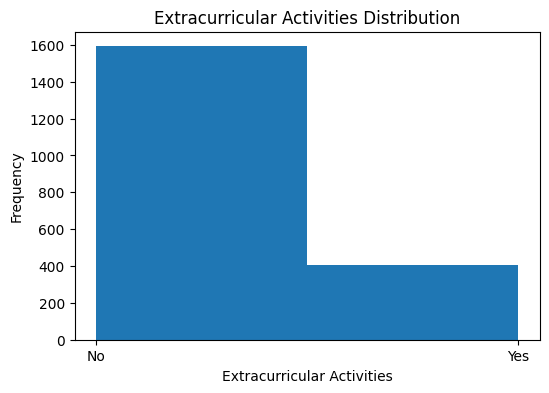

In [18]:

# Calculate the distribution of missing days
missing_days_dist = np.histogram(missing_days, bins=10)

# Plot the distribution of missing days
plt.figure(figsize=(6, 4))
plt.hist(missing_days, bins=10)
plt.title('Missing Days Distribution')
plt.xlabel('Number of Missing Days')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of part-time job
plt.figure(figsize=(6, 4))
plt.hist(part_time_job, bins=2)
plt.title('Part-Time Job Distribution')
plt.xlabel('Part-Time Job')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Plot the distribution of weekly self-study hours
plt.figure(figsize=(6, 4))
plt.hist(weekly_self_study_hours, bins=10)
plt.title('Weekly Self-Study Hours Distribution')
plt.xlabel('Number of Weekly Self-Study Hours')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of extracurricular activities
plt.figure(figsize=(6, 4))
plt.hist(extracurricular_activities, bins=2)
plt.title('Extracurricular Activities Distribution')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

From the missing_days distriutions we can see that most students missed between 2-4 days in total and a few missed more than that. 

We can also see that most of the students do not work part time.

From the study hours distrubution we can see most students study between 0-5 hours a week and then another large amount study between 30-35. Very little study between 40-50 hours a week.

The distrubution also tell us that most students do not partake in extra currilar activities.

Text(0.5, 1.0, 'Distribution of Part-time Job Hours')

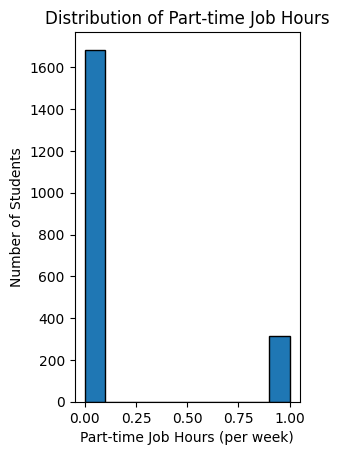

In [19]:
plt.subplot(122)  # Second subplot for part-time job hours
plt.hist(part_time_job, bins=10, edgecolor='black')
plt.xlabel('Part-time Job Hours (per week)')
plt.ylabel('Number of Students')
plt.title('Distribution of Part-time Job Hours')

We can see that around 380 students do have a part time and over 1600 students do not. This is a very small amount of students who do work.

Text(0.5, 1.0, 'Distribution of Part-time Job Hours')

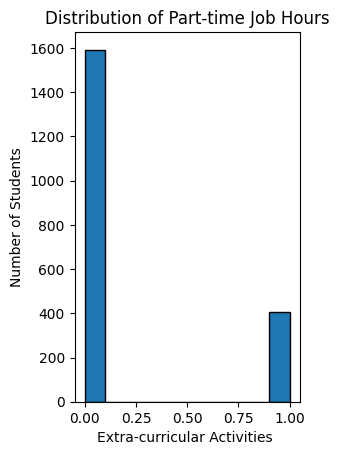

In [20]:
plt.subplot(122)  # Second subplot for part-time job hours
plt.hist(extracurricular_activities, bins=10, edgecolor='black')
plt.xlabel('Extra-curricular Activities ')
plt.ylabel('Number of Students')
plt.title('Distribution of Part-time Job Hours')

Over 400 students do partake in extra curricular acitivies whereas just under 1600 students do not. Only 1/4 of students partcipate in extra curriclar. 

From this all I want to be able to see what factors affect students performance the most especially on the subjects where they dont perform as well. This is what will be index will be on

<h1> Linear regressions </h1>

Now I will be showing all the linear regressions between each variable in the dataset

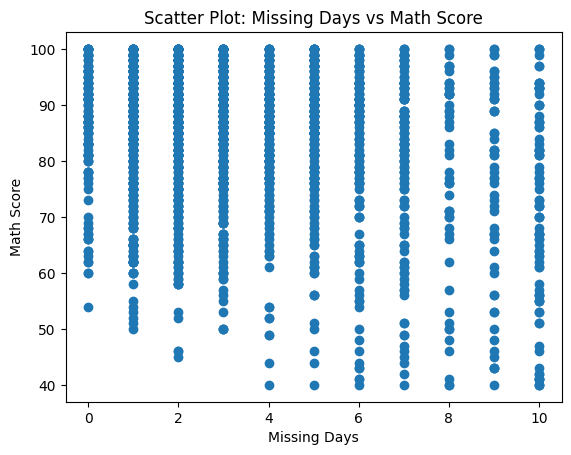

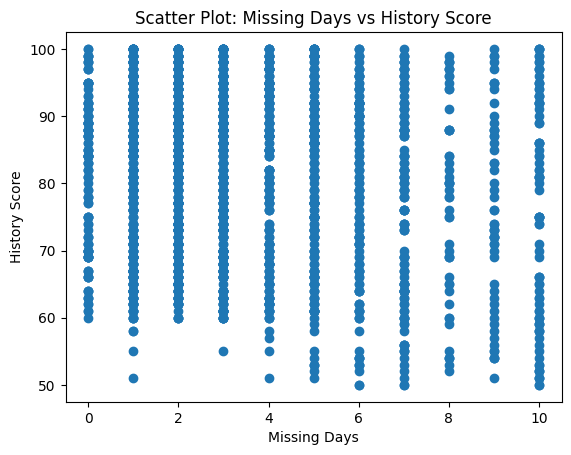

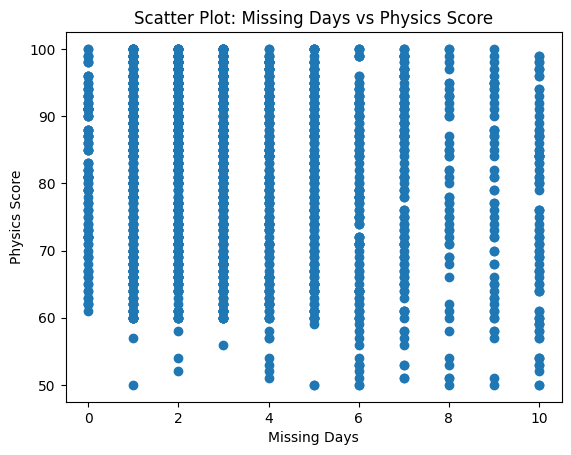

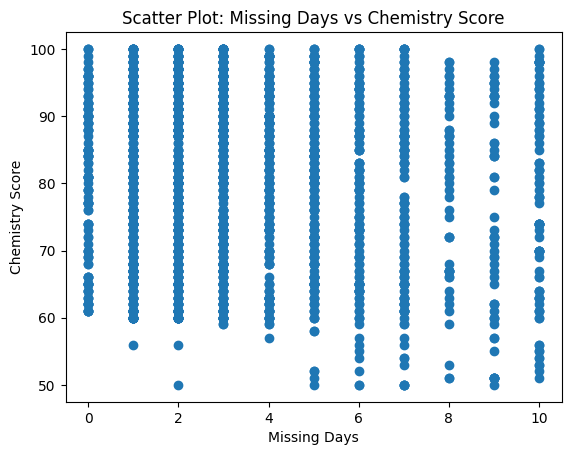

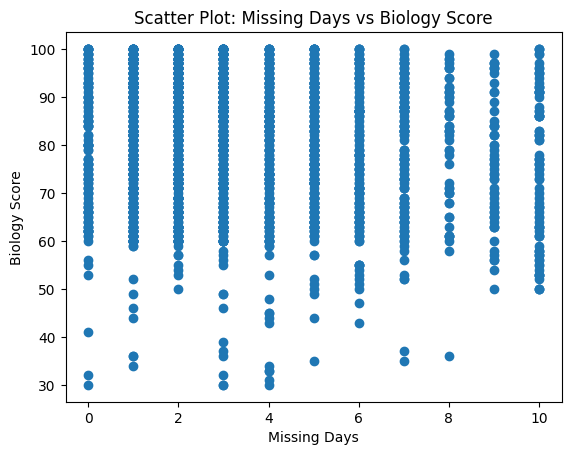

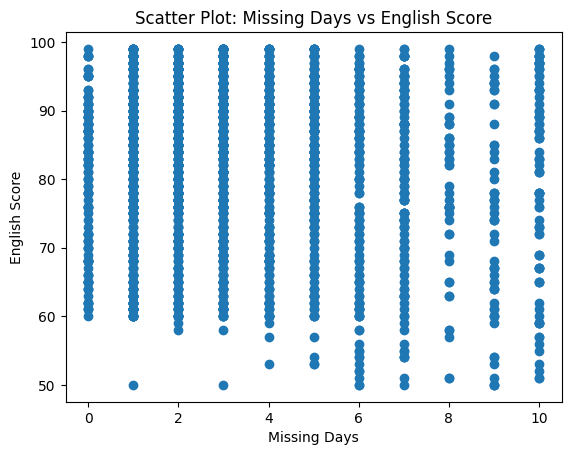

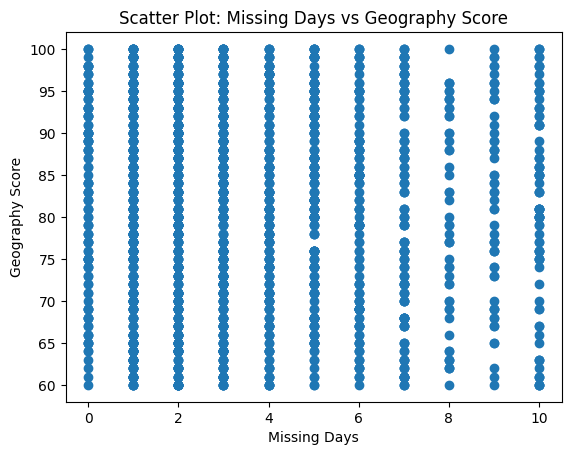

In [21]:

# Scatter plot between missing_days and math_score
plt.scatter(missing_days, math_score)
plt.xlabel('Missing Days')
plt.ylabel('Math Score')
plt.title('Scatter Plot: Missing Days vs Math Score')
plt.show()

# Scatter plot between missing_days and history_score
plt.scatter(missing_days, history_score)
plt.xlabel('Missing Days')
plt.ylabel('History Score')
plt.title('Scatter Plot: Missing Days vs History Score')
plt.show()

# Scatter plot between missing_days and physics_score
plt.scatter(missing_days, physics_score)
plt.xlabel('Missing Days')
plt.ylabel('Physics Score')
plt.title('Scatter Plot: Missing Days vs Physics Score')
plt.show()

# Scatter plot between missing_days and chemistry_score
plt.scatter(missing_days, chemistry_score)
plt.xlabel('Missing Days')
plt.ylabel('Chemistry Score')
plt.title('Scatter Plot: Missing Days vs Chemistry Score')
plt.show()

# Scatter plot between missing_days and biology_score
plt.scatter(missing_days, biology_score)
plt.xlabel('Missing Days')
plt.ylabel('Biology Score')
plt.title('Scatter Plot: Missing Days vs Biology Score')
plt.show()

# Scatter plot between missing_days and english_score
plt.scatter(missing_days, english_score)
plt.xlabel('Missing Days')
plt.ylabel('English Score')
plt.title('Scatter Plot: Missing Days vs English Score')
plt.show()

# Scatter plot between missing_days and geography_score
plt.scatter(missing_days, geography_score)
plt.xlabel('Missing Days')
plt.ylabel('Geography Score')
plt.title('Scatter Plot: Missing Days vs Geography Score')
plt.show()



Above is the relationship between missing days and scores across various subjects. We can see there is no correlation between missing dayds and how well your perform in the subject. As we can see from the graph below the amount of days you miss doesn't directly affect your scores in maths. This is the same for all other subjects. 

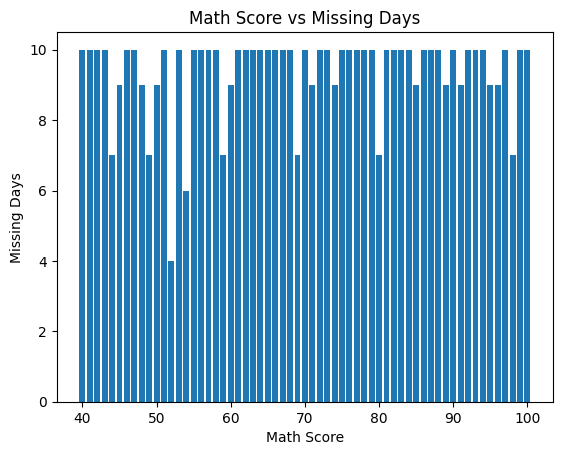

In [22]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(math_score, missing_days)

# Set the labels and title
plt.xlabel('Math Score')
plt.ylabel('Missing Days')
plt.title('Math Score vs Missing Days')

# Show the plot
plt.show()


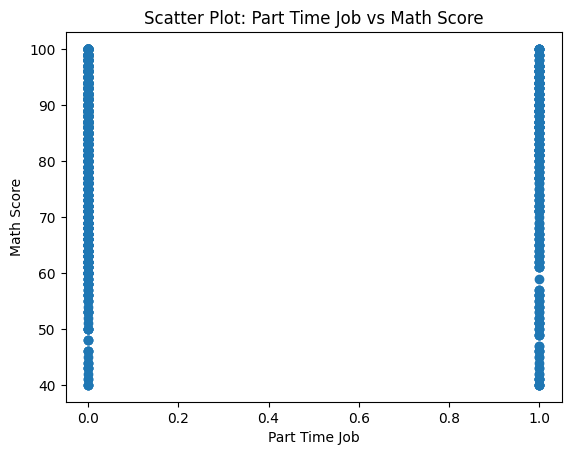

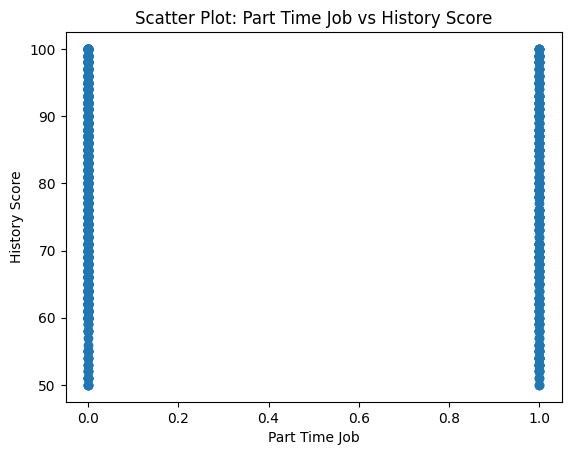

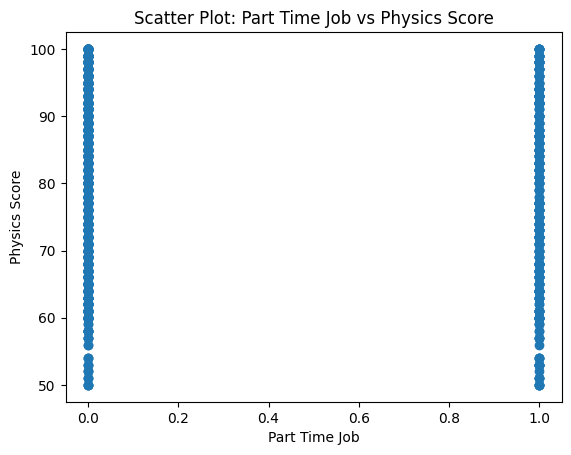

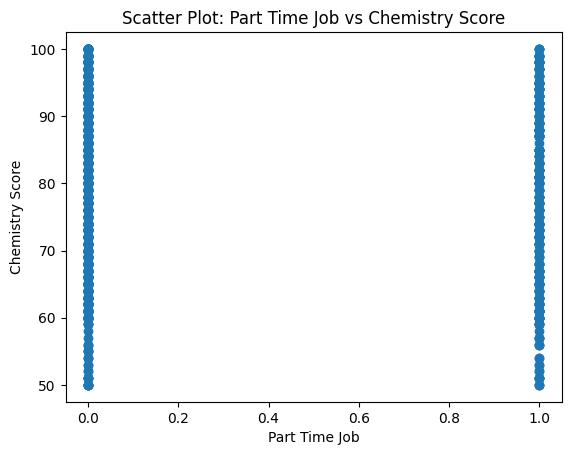

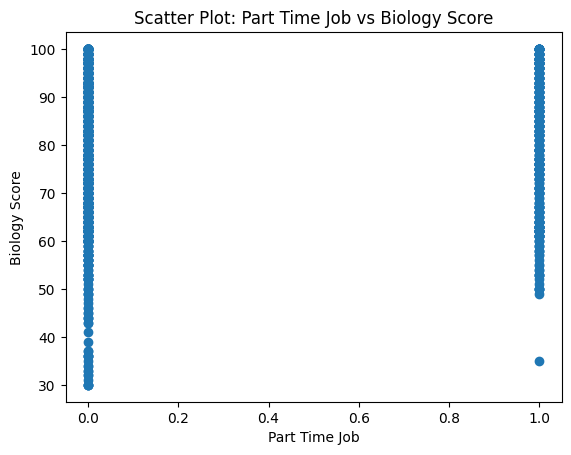

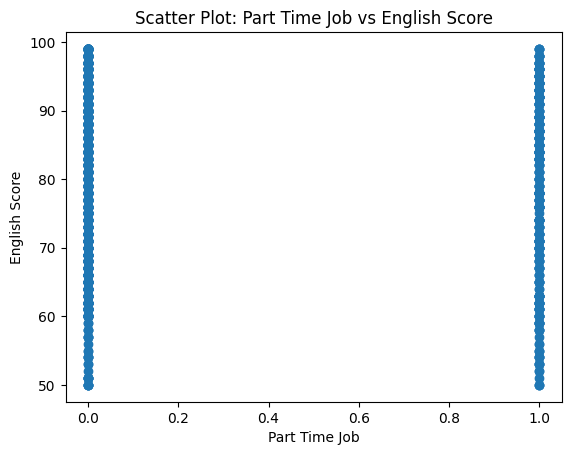

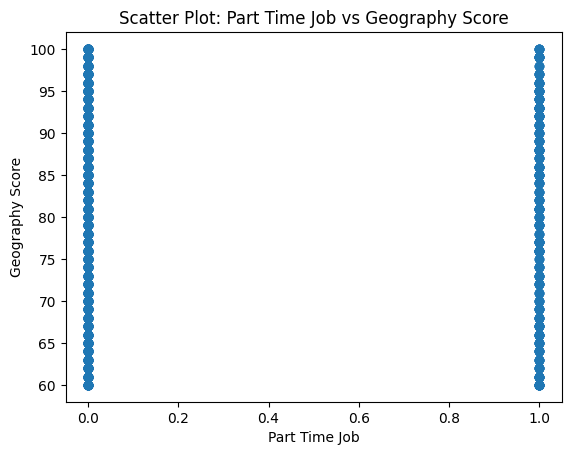

In [23]:


# Scatter plot between part_time_job and math_score
plt.scatter(part_time_job, math_score)
plt.xlabel('Part Time Job')
plt.ylabel('Math Score')
plt.title('Scatter Plot: Part Time Job vs Math Score')
plt.show()

# Scatter plot between part_time_job and history_score
plt.scatter(part_time_job, history_score)
plt.xlabel('Part Time Job')
plt.ylabel('History Score')
plt.title('Scatter Plot: Part Time Job vs History Score')
plt.show()

# Scatter plot between part_time_job and physics_score
plt.scatter(part_time_job, physics_score)
plt.xlabel('Part Time Job')
plt.ylabel('Physics Score')
plt.title('Scatter Plot: Part Time Job vs Physics Score')
plt.show()

# Scatter plot between part_time_job and chemistry_score
plt.scatter(part_time_job, chemistry_score)
plt.xlabel('Part Time Job')
plt.ylabel('Chemistry Score')
plt.title('Scatter Plot: Part Time Job vs Chemistry Score')
plt.show()

# Scatter plot between part_time_job and biology_score
plt.scatter(part_time_job, biology_score)
plt.xlabel('Part Time Job')
plt.ylabel('Biology Score')
plt.title('Scatter Plot: Part Time Job vs Biology Score')
plt.show()

# Scatter plot between part_time_job and english_score
plt.scatter(part_time_job, english_score)
plt.xlabel('Part Time Job')
plt.ylabel('English Score')
plt.title('Scatter Plot: Part Time Job vs English Score')
plt.show()

# Scatter plot between part_time_job and geography_score
plt.scatter(part_time_job, geography_score)
plt.xlabel('Part Time Job')
plt.ylabel('Geography Score')
plt.title('Scatter Plot: Part Time Job vs Geography Score')
plt.show()


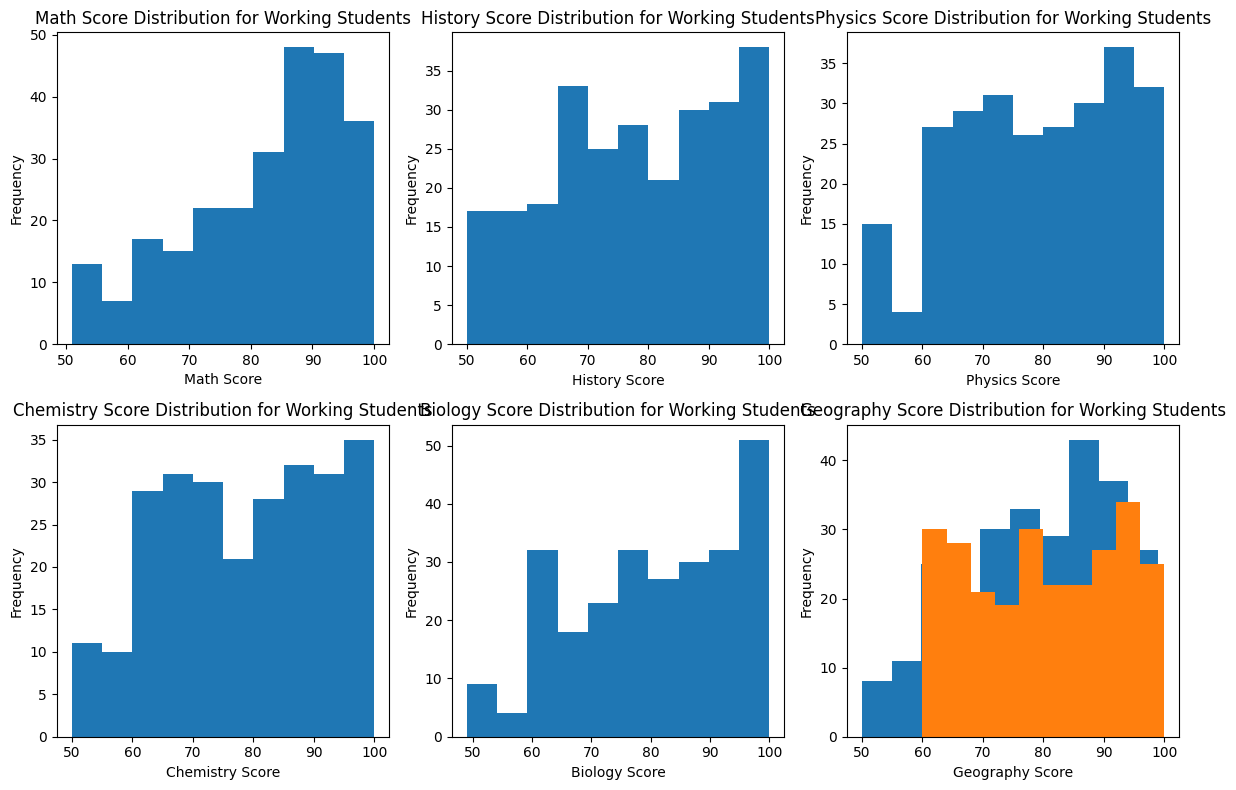

In [24]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only those who work
working_students = df[df['part_time_job_True'] == 1]

# Create a histogram for each subject
plt.figure(figsize=(12, 8))



plt.subplot(231)
plt.hist(working_students['math_score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Distribution for Working Students')

plt.subplot(232)
plt.hist(working_students['history_score'])
plt.xlabel('History Score')
plt.ylabel('Frequency')
plt.title('History Score Distribution for Working Students')

plt.subplot(233)
plt.hist(working_students['physics_score'])
plt.xlabel('Physics Score')
plt.ylabel('Frequency')
plt.title('Physics Score Distribution for Working Students')

plt.subplot(234)
plt.hist(working_students['chemistry_score'])
plt.xlabel('Chemistry Score')
plt.ylabel('Frequency')
plt.title('Chemistry Score Distribution for Working Students')

plt.subplot(235)
plt.hist(working_students['biology_score'])
plt.xlabel('Biology Score')
plt.ylabel('Frequency')
plt.title('Biology Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['english_score'])
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.title('English Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['geography_score'])
plt.xlabel('Geography Score')
plt.ylabel('Frequency')
plt.title('Geography Score Distribution for Working Students')

plt.tight_layout()
plt.show()


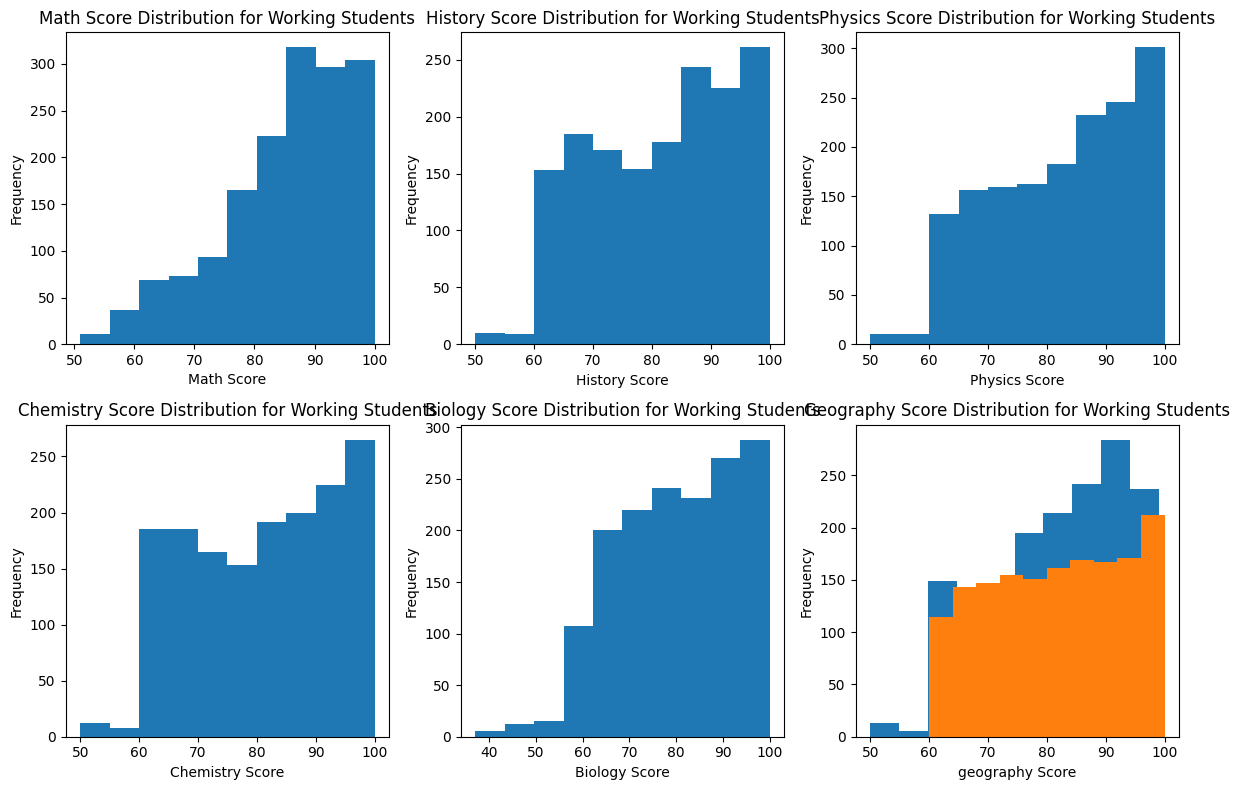

In [25]:

import matplotlib.pyplot as plt



# Filter the dataframe to include only those who work
working_students = df[df['part_time_job_True'] == 0]

# Create a histogram for each subject
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.hist(working_students['math_score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Distribution for Working Students')

plt.subplot(232)
plt.hist(working_students['history_score'])
plt.xlabel('History Score')
plt.ylabel('Frequency')
plt.title('History Score Distribution for Working Students')

plt.subplot(233)
plt.hist(working_students['physics_score'])
plt.xlabel('Physics Score')
plt.ylabel('Frequency')
plt.title('Physics Score Distribution for Working Students')

plt.subplot(234)
plt.hist(working_students['chemistry_score'])
plt.xlabel('Chemistry Score')
plt.ylabel('Frequency')
plt.title('Chemistry Score Distribution for Working Students')

plt.subplot(235)
plt.hist(working_students['biology_score'])
plt.xlabel('Biology Score')
plt.ylabel('Frequency')
plt.title('Biology Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['english_score'])
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.title('English Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['geography_score'])
plt.xlabel('geography Score')
plt.ylabel('Frequency')
plt.title('Geography Score Distribution for Working Students')

plt.tight_layout()
plt.show()





Comparing the graphs we can see there is a slight difference between the scores if you work part time rather than if you didn't. However we have to take into account that they both generally perform the same across all subjects. We also have to consider there is around 1/4 of students who actually work and can still maintain main a grade. From this I think having a part time job does not affect these students grades.

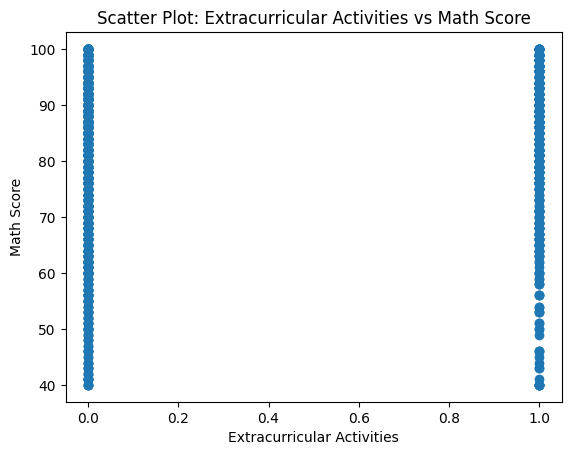

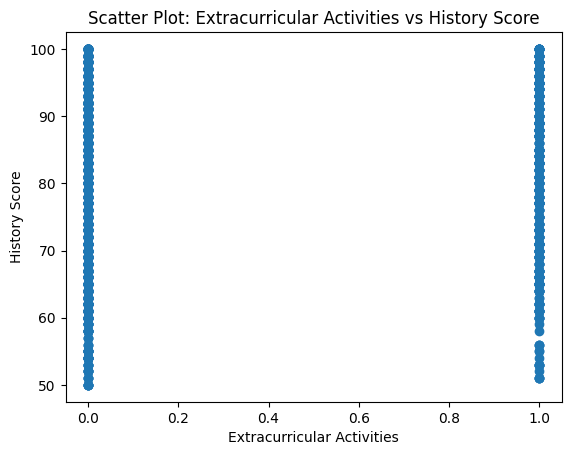

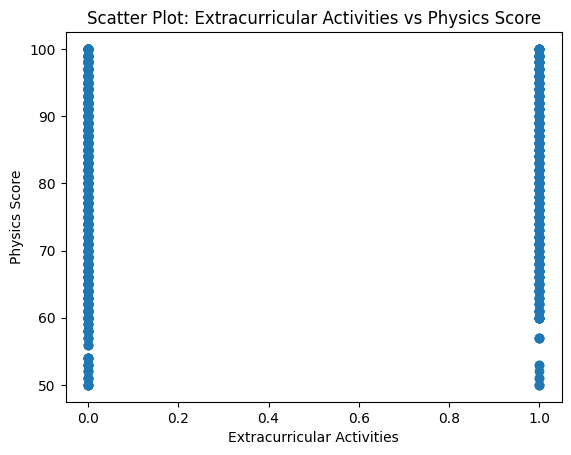

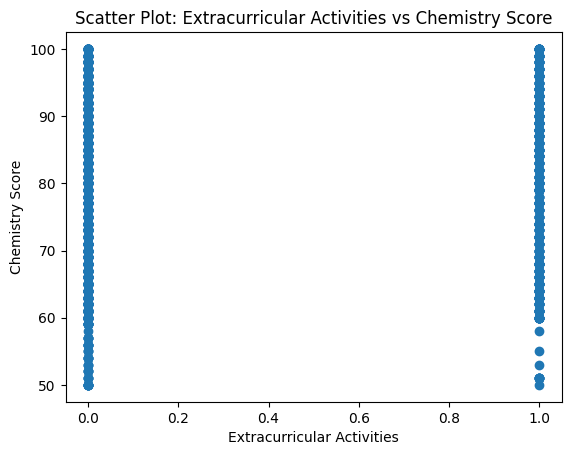

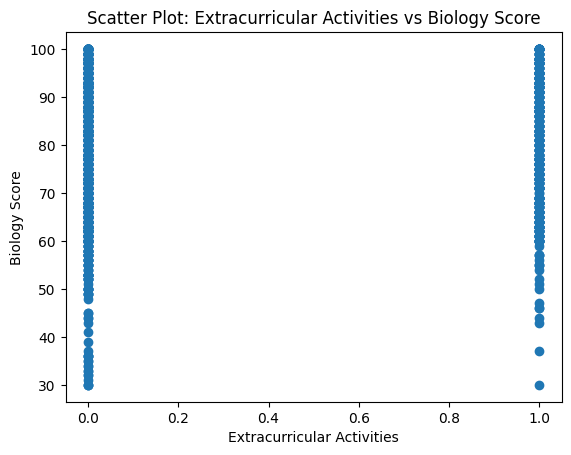

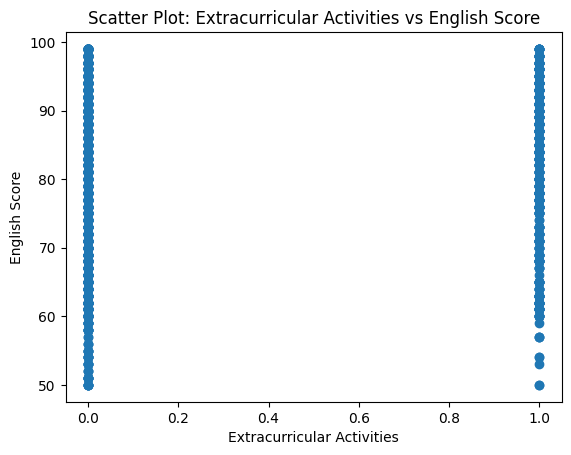

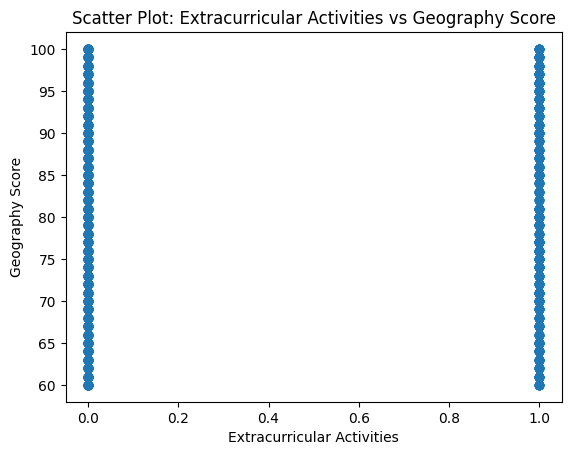

In [26]:

# Scatter plot between extracurricular_activities and math_score
plt.scatter(extracurricular_activities, math_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Math Score')
plt.title('Scatter Plot: Extracurricular Activities vs Math Score')
plt.show()

# Scatter plot between extracurricular_activities and history_score
plt.scatter(extracurricular_activities, history_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('History Score')
plt.title('Scatter Plot: Extracurricular Activities vs History Score')
plt.show()

# Scatter plot between extracurricular_activities and physics_score
plt.scatter(extracurricular_activities, physics_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Physics Score')
plt.title('Scatter Plot: Extracurricular Activities vs Physics Score')
plt.show()

# Scatter plot between extracurricular_activities and chemistry_score
plt.scatter(extracurricular_activities, chemistry_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Chemistry Score')
plt.title('Scatter Plot: Extracurricular Activities vs Chemistry Score')
plt.show()

# Scatter plot between extracurricular_activities and biology_score
plt.scatter(extracurricular_activities, biology_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Biology Score')
plt.title('Scatter Plot: Extracurricular Activities vs Biology Score')
plt.show()

# Scatter plot between extracurricular_activities and english_score
plt.scatter(extracurricular_activities, english_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('English Score')
plt.title('Scatter Plot: Extracurricular Activities vs English Score')
plt.show()

# Scatter plot between extracurricular_activities and geography_score
plt.scatter(extracurricular_activities, geography_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Geography Score')
plt.title('Scatter Plot: Extracurricular Activities vs Geography Score')
plt.show()

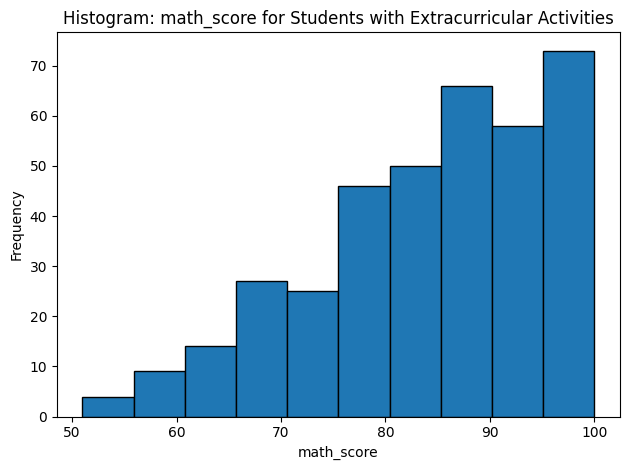

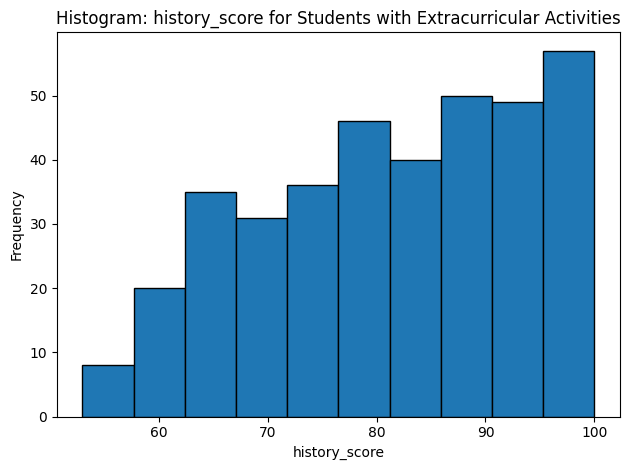

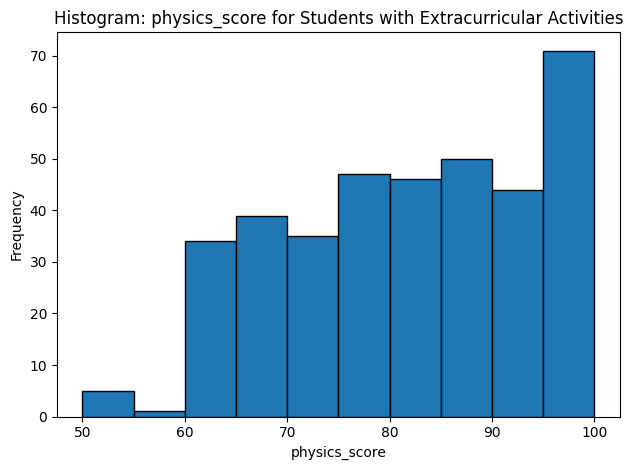

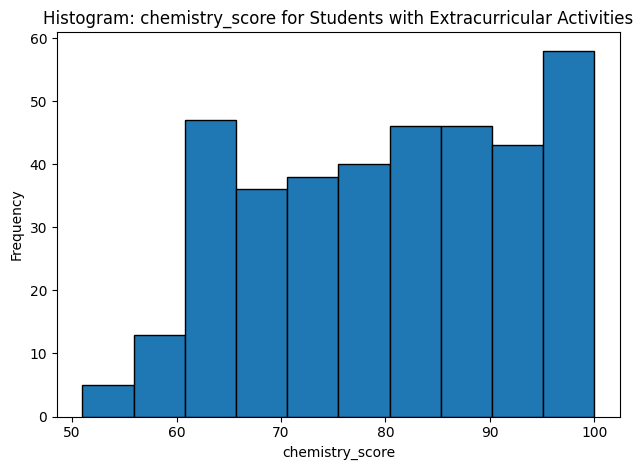

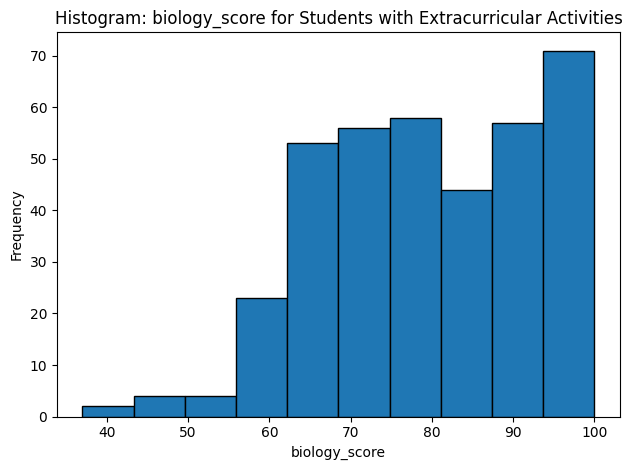

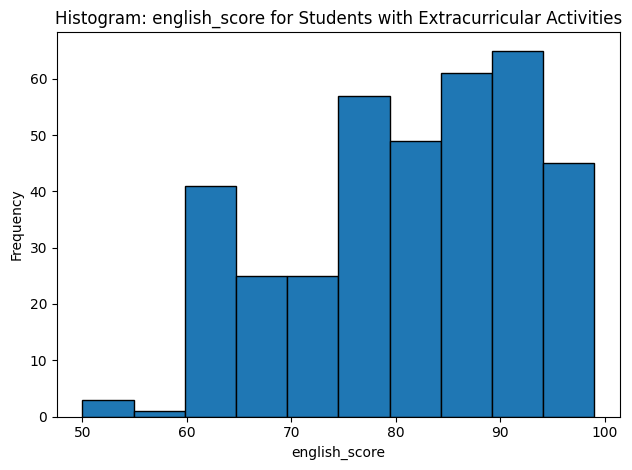

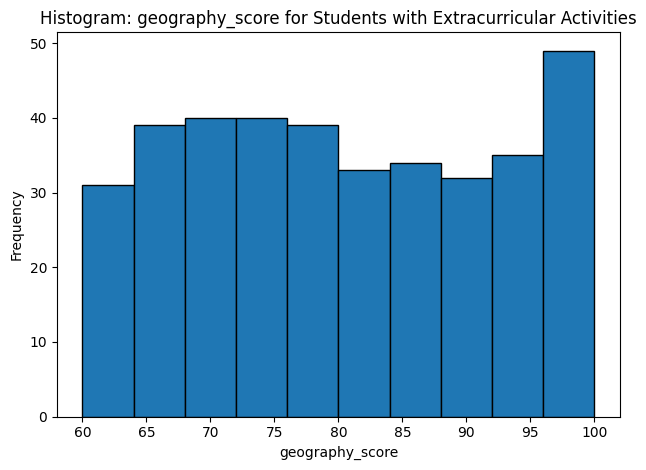

In [27]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only students who partake in extracurricular activities
extracurricular_students = df[df['extracurricular_activities_True'] == 1]

# Create a histogram for each subject
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
for subject in subjects:
    plt.hist(extracurricular_students[subject], bins=10, edgecolor='black')
    plt.xlabel(subject)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: {subject} for Students with Extracurricular Activities')
    plt.tight_layout()
    plt.show()


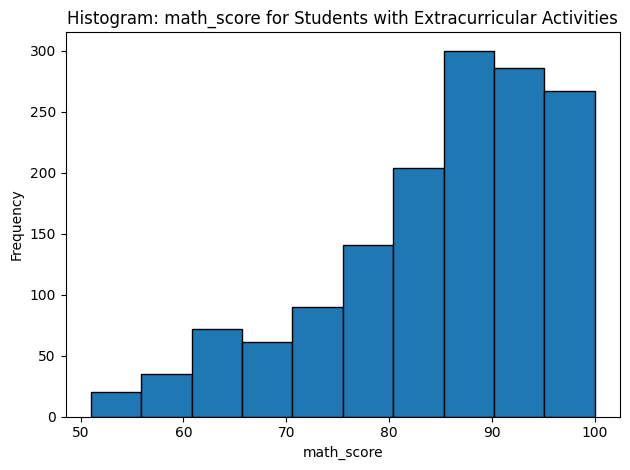

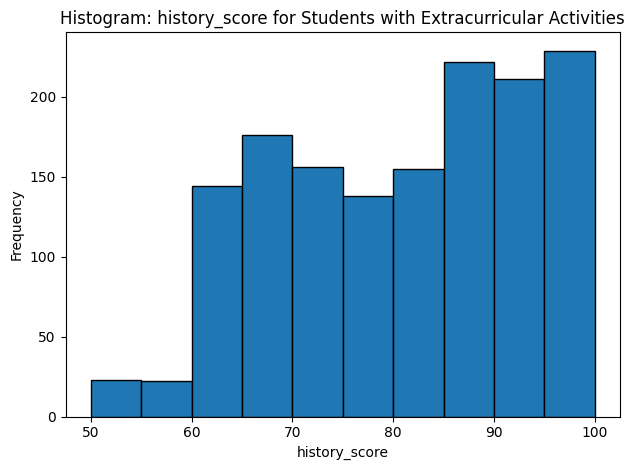

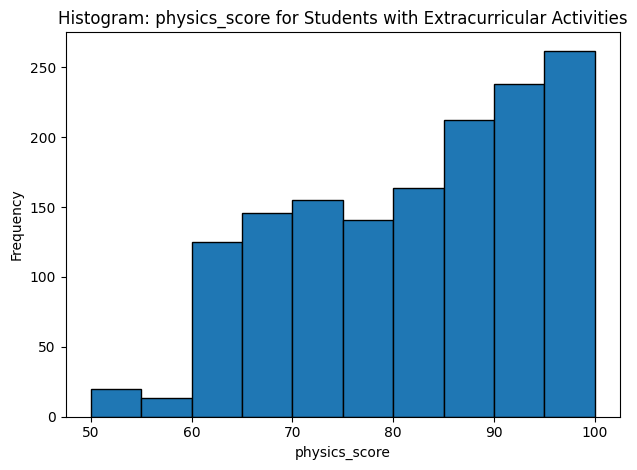

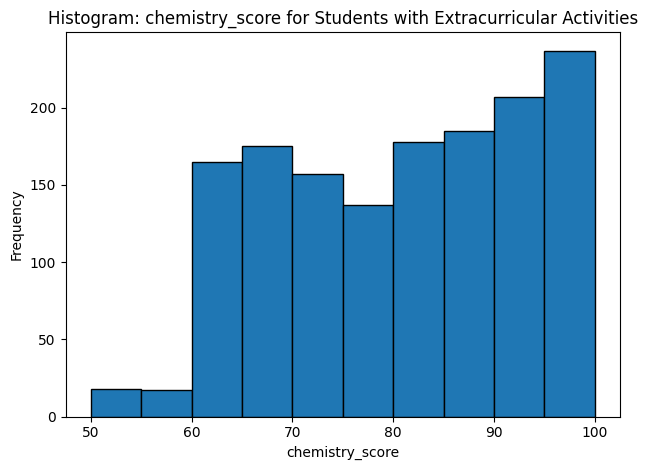

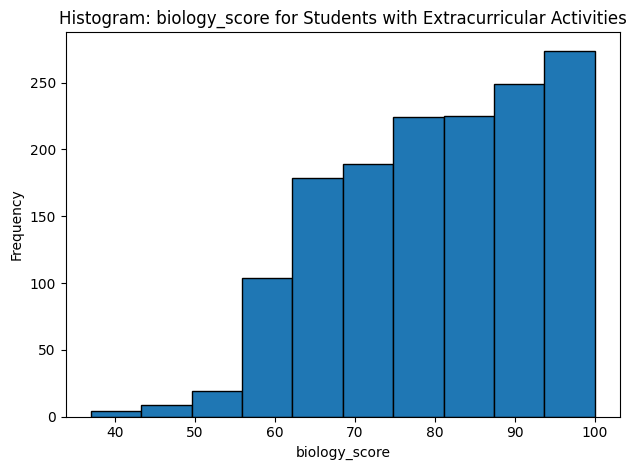

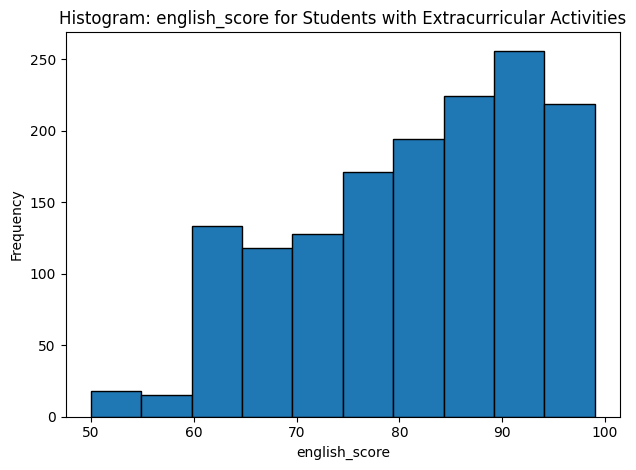

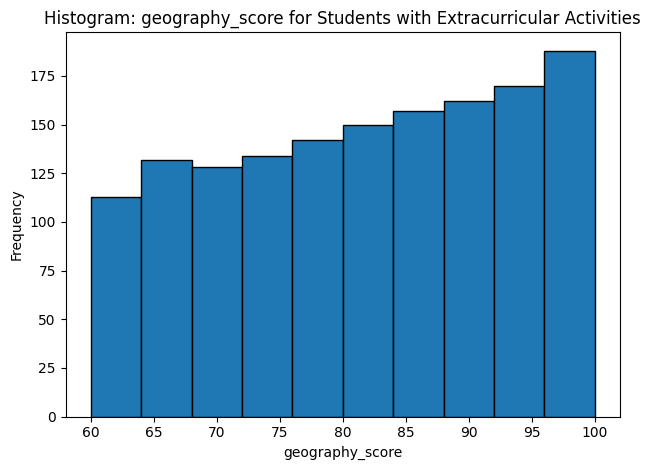

In [28]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only students who partake in extracurricular activities
extracurricular_students = df[df['extracurricular_activities_True'] == 0]

# Create a histogram for each subject
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
for subject in subjects:
    plt.hist(extracurricular_students[subject], bins=10, edgecolor='black')
    plt.xlabel(subject)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: {subject} for Students with Extracurricular Activities')
    plt.tight_layout()
    plt.show()

This is the same result there seems to be no affect between if you have an extra curricular activity than if you dont. Across in all subjects those who did and didn't have one performed the same.

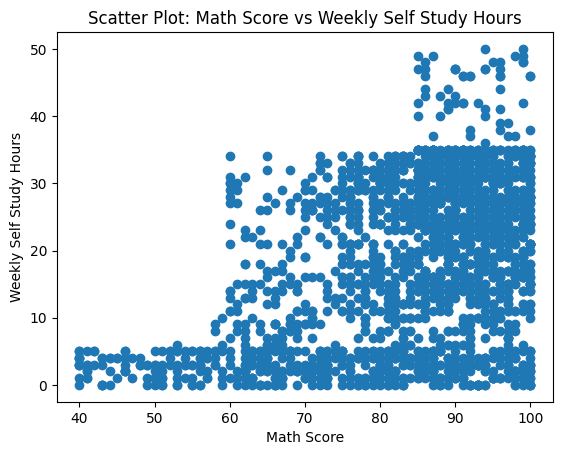

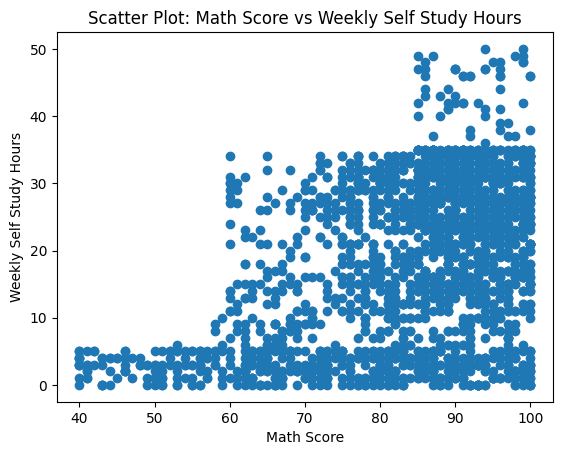

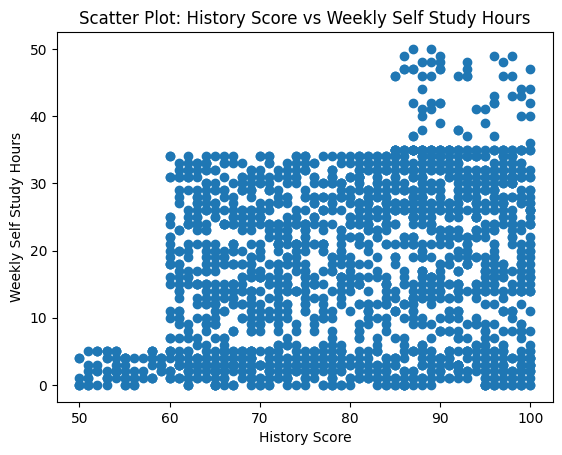

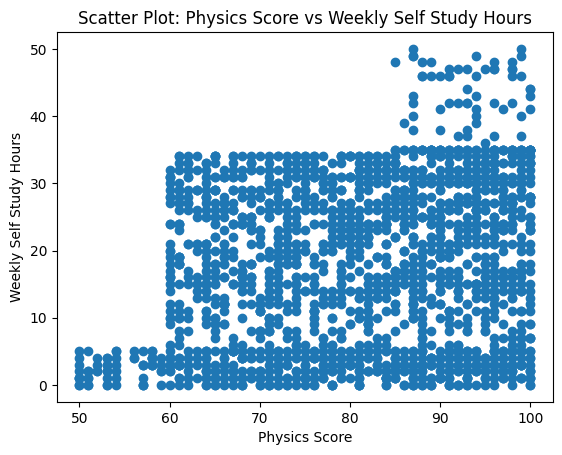

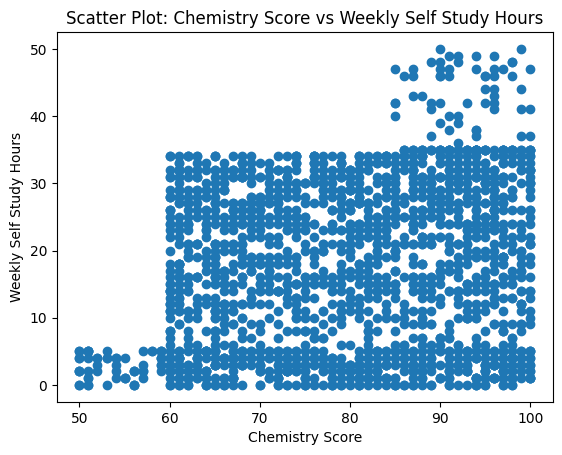

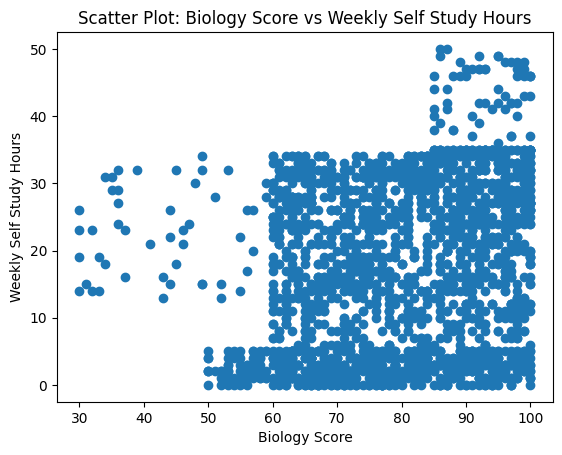

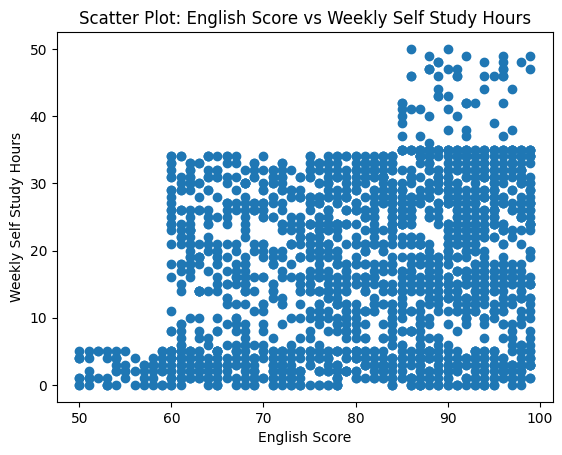

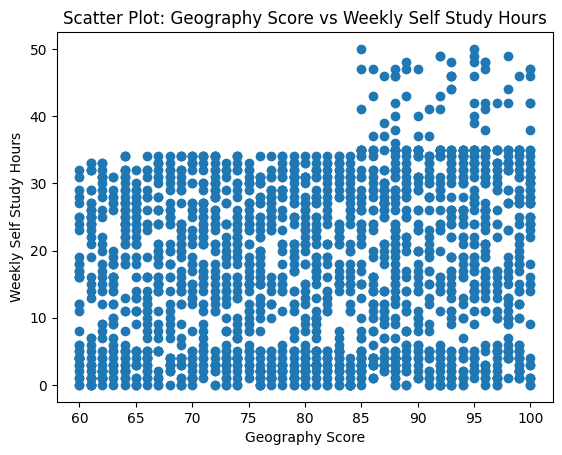

In [29]:
# Scatter plot for math_score
plt.scatter(math_score, weekly_self_study_hours)
plt.xlabel('Math Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Math Score vs Weekly Self Study Hours')
plt.show()



# Scatter plot for math_score
plt.scatter(math_score, weekly_self_study_hours)
plt.xlabel('Math Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Math Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for history_score
plt.scatter(history_score, weekly_self_study_hours)
plt.xlabel('History Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: History Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for physics_score
plt.scatter(physics_score, weekly_self_study_hours)
plt.xlabel('Physics Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Physics Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for chemistry_score
plt.scatter(chemistry_score, weekly_self_study_hours)
plt.xlabel('Chemistry Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Chemistry Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for biology_score
plt.scatter(biology_score, weekly_self_study_hours)
plt.xlabel('Biology Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Biology Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for english_score
plt.scatter(english_score, weekly_self_study_hours)
plt.xlabel('English Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: English Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for geography_score
plt.scatter(geography_score, weekly_self_study_hours)
plt.xlabel('Geography Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Geography Score vs Weekly Self Study Hours')
plt.show()



* Maths score and study hours:
    There's a slight upward trend in the data points, suggesting that as the number of study hours increases, the math scores tend to increase as well.
    The data points are scattered around the trendline, meaning the correlation is not very strong. There are many students who studied for a similar amount of time but got different scores, and vice versa.
* History score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between history scores and study hours.
 * Physcis and chemsitry score and study hours:
    The data points show a somewhat upward trend, with a spread of scores around the line. This suggests a positive correlation between physics and chemsitry scores and study hours. In other words, there's a tendency for students who study physics and chemistry for more hours to score higher on exams, compared to students who study for fewer hours.  But it's not an extremely strong correlation.
* Biology score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between biology scores and study hours.
* English score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between english scores and study hours.
* Geography score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between geography scores and study hours.

Overall, the data suggests that there is a weak to moderate positive correlation between study hours and math, physics, and chemistry scores. However, there is no clear correlation between study hours and history, biology, english, and geography scores.


In [30]:
from scipy.stats import pearsonr

# Pearson correlation between part_time_job and weekly_self_study_hours
corr_part_time_job_weekly_self_study, _ = pearsonr(part_time_job, weekly_self_study_hours)
print(f"Pearson correlation between part_time_job and weekly_self_study_hours: {corr_part_time_job_weekly_self_study}")

# Pearson correlation between extracurricular_activities and weekly_self_study_hours
corr_extracurricular_weekly_self_study, _ = pearsonr(extracurricular_activities, weekly_self_study_hours)
print(f"Pearson correlation between extracurricular_activities and weekly_self_study_hours: {corr_extracurricular_weekly_self_study}")

# Pearson correlation between missing_days and weekly_self_study_hours
corr_missing_days_weekly_self_study, _ = pearsonr(missing_days, weekly_self_study_hours)
print(f"Pearson correlation between missing_days and weekly_self_study_hours: {corr_missing_days_weekly_self_study}")

# Pearson correlation between part_time_job and missing_days
corr_part_time_job_missing_days, _ = pearsonr(part_time_job, missing_days)
print(f"Pearson correlation between part_time_job and missing_days: {corr_part_time_job_missing_days}")

# Pearson correlation between extracurricular_activities and missing_days
corr_extracurricular_missing_days, _ = pearsonr(extracurricular_activities, missing_days)
print(f"Pearson correlation between extracurricular_activities and missing_days: {corr_extracurricular_missing_days}")

# Pearson correlation between part_time_job and extracurricular_activities
corr_part_time_job_extracurricular, _ = pearsonr(part_time_job, extracurricular_activities)
print(f"Pearson correlation between part_time_job and extracurricular_activities: {corr_part_time_job_extracurricular}")

##############################################################################################
#Pearson correlation between part_time_job and missing_days: 0.20636065645123192 MUTLICONLINEARITY!!!!!!!!!!!!!

Pearson correlation between part_time_job and weekly_self_study_hours: -0.21396262099554253
Pearson correlation between extracurricular_activities and weekly_self_study_hours: -0.052515107701837524
Pearson correlation between missing_days and weekly_self_study_hours: -0.28608562324974673
Pearson correlation between part_time_job and missing_days: 0.20636065645123192
Pearson correlation between extracurricular_activities and missing_days: 0.02901865164126651
Pearson correlation between part_time_job and extracurricular_activities: -0.00838213210214696
